In [31]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os


In [23]:
#hyperparameter
IMAGE_SIZE = [224, 224]
train_path = 'train'
validation_path = 'val'
img_height = IMAGE_SIZE[0]
img_width = IMAGE_SIZE[1]
batch_size = 32
nb_epochs = 25
categories = os.listdir(train_path)

data_gen_args = dict(rescale=1./255,
                     shear_range=0.2,
                     zoom_range=0.2,
                     vertical_flip=True,
                     rotation_range=40,
                     width_shift_range=0.2,
                     height_shift_range=0.2)

adam_optim_args = dict(lr=0.001, beta_1=0.9, 
                       beta_2=0.999, 
                       epsilon=1e-07, 
                       amsgrad=False)

In [24]:
#base model
base_vgg_model = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in base_vgg_model.layers:
  layer.trainable = False


In [25]:
#model
x = Flatten()(base_vgg_model.output)
prediction = Dense(len(categories), activation='softmax')(x)

model = Model(inputs=base_vgg_model.input, outputs=prediction)

model.summary()

optim = Adam(**adam_optim_args)

model.compile(
  loss='categorical_crossentropy',
  optimizer=optim,
  metrics=['accuracy']
)


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [26]:
#data augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(**data_gen_args)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255,)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 1461 images belonging to 6 classes.
Found 368 images belonging to 6 classes.


In [27]:
#training model
r = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

Epoch 1/25
45/45 [==============================] - 166s 4s/step - loss: 1.8312 - accuracy: 0.4185 - val_loss: 0.7594 - val_accuracy: 0.7330
Epoch 2/25
45/45 [==============================] - 176s 4s/step - loss: 0.7165 - accuracy: 0.7457 - val_loss: 0.4991 - val_accuracy: 0.8210
Epoch 3/25
45/45 [==============================] - 179s 4s/step - loss: 0.5853 - accuracy: 0.7909 - val_loss: 0.5590 - val_accuracy: 0.7812
Epoch 4/25
45/45 [==============================] - 180s 4s/step - loss: 0.5326 - accuracy: 0.8223 - val_loss: 0.6272 - val_accuracy: 0.7670
Epoch 5/25
45/45 [==============================] - 181s 4s/step - loss: 0.5251 - accuracy: 0.8260 - val_loss: 0.5276 - val_accuracy: 0.8352
Epoch 6/25
45/45 [==============================] - 182s 4s/step - loss: 0.4243 - accuracy: 0.8536 - val_loss: 0.5429 - val_accuracy: 0.8239
Epoch 7/25
45/45 [==============================] - 181s 4s/step - loss: 0.5030 - accuracy: 0.8370 - val_loss: 0.6846 - val_accuracy: 0.7955
Epoch 8/25
45

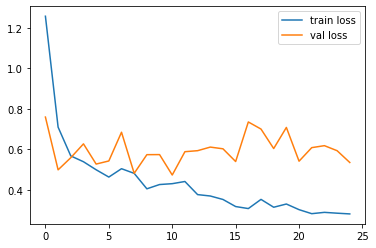

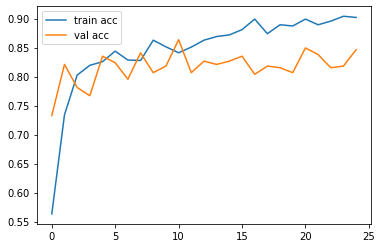

<Figure size 432x288 with 0 Axes>

In [37]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png',dpi=300, bbox_inches='tight')
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png',dpi=300, bbox_inches='tight')



In [ ]:
# #save model
# version = "1"
# export_dir = "Model\{}".format(version)
# export_file_dir = "Model\{}.h5".format(version)
# tf.saved_model.save(model,export_dir=export_dir)
# model.save(export_file_dir)